# Summer Olympics Data Analysis Assignment

In [1]:
import pandas as pd
df=pd.read_csv('summer_olympics.csv')

In [2]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


### 1. In how many cities Summer Olympics is held so far?

In [3]:
print('Summer Olympics is held so far in',len(df['City'].unique()),'Cities')

Summer Olympics is held so far in 22 Cities


#Data frame having only gold medals

In [4]:
gold=df[(df['Medal']=='Gold')] #dataframe which has medal as gold
gold.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold


### 2. Which sport is having most number of Gold Medals so far? (Top 5)

Sport having most number of medals is
 Sport
Aquatics    1421
Name: Medal, dtype: int64


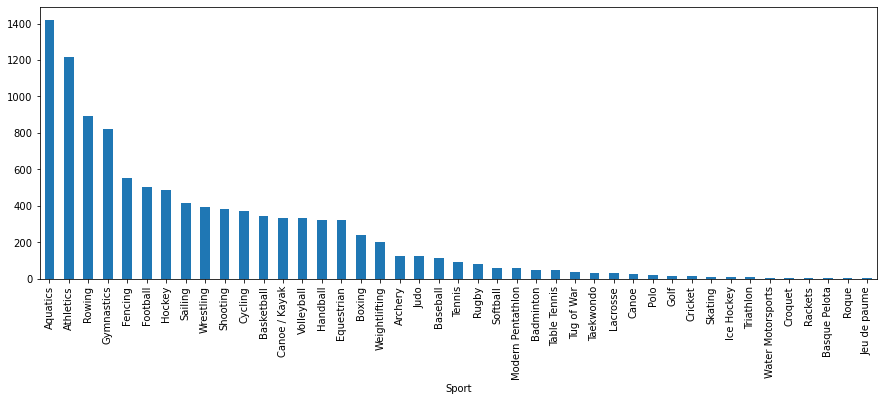

In [6]:
gold.groupby('Sport').count()['Medal'].sort_values(ascending=False).plot(kind='bar',figsize=(15,5))
print('Sport having most number of medals is\n',gold.groupby('Sport').count()['Medal'].head(1))


### 3. Which sport is having most number of medals so far? (Top 5)

Sport having most number of medals is
 Sport
Aquatics    4170
Name: Medal, dtype: int64


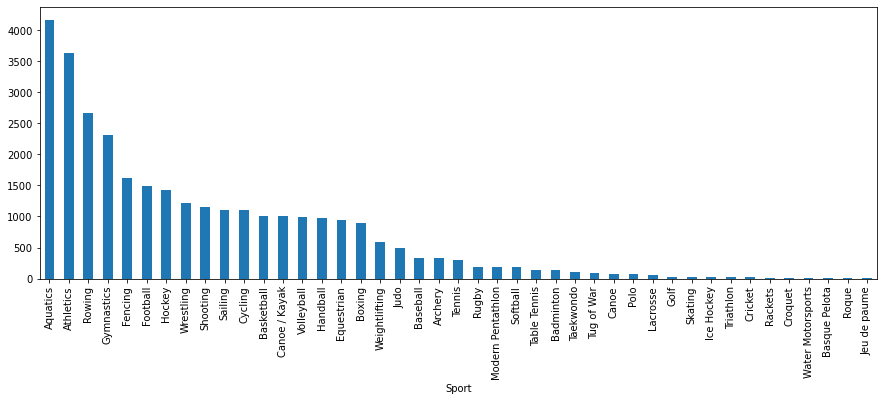

In [7]:
df.groupby('Sport').count()['Medal'].sort_values(ascending=False).plot(kind='bar',figsize=(15,5))
print('Sport having most number of medals is\n',df.groupby('Sport').count()['Medal'].head(1))


### 4. Which player has won most number of medals? (Top 5)

Top player who won most number of medals is
 Athlete
PHELPS, Michael    22
Name: Medal, dtype: int64


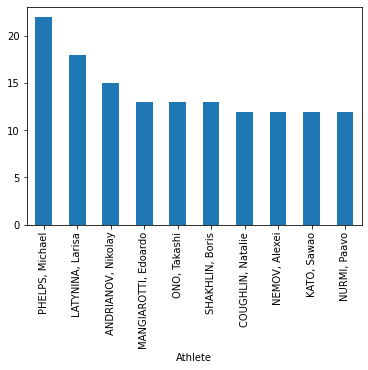

In [8]:
df.groupby('Athlete')['Medal'].count().sort_values(ascending=False).head(10).plot.bar()
print('Top player who won most number of medals is\n',df.groupby('Athlete')['Medal'].count().sort_values(ascending=False).head(1))

### 5. Which player has won most number Gold Medals of medals? (Top 5)

Top player who won most number of gold medals is
 Athlete
PHELPS, Michael    18
Name: Medal, dtype: int64


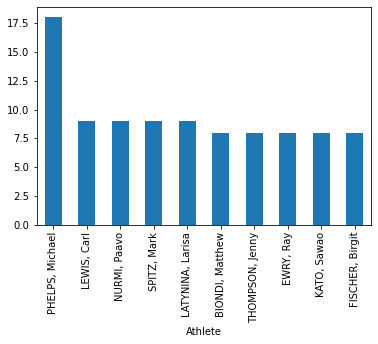

In [9]:
gold.groupby('Athlete').count()['Medal'].sort_values(ascending=False).head(10).plot.bar()
print('Top player who won most number of gold medals is\n',gold.groupby('Athlete')['Medal'].count().sort_values(ascending=False).head(1))

### 6. In which year India won first Gold Medal in Summer Olympics?

In [10]:
i=gold[gold['Country']=='IND'] #dataframe having medal as gold and country as India
i.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold
5513,1928,Amsterdam,Hockey,Hockey,"CHAND, Dyan",IND,Men,Hockey,Gold
5514,1928,Amsterdam,Hockey,Hockey,"GATELEY, Maurice A.",IND,Men,Hockey,Gold
5515,1928,Amsterdam,Hockey,Hockey,"GILL, K. S.",IND,Men,Hockey,Gold
5516,1928,Amsterdam,Hockey,Hockey,"GOODSIR-CULLEN, William John",IND,Men,Hockey,Gold


In [11]:
i=i.sort_values(by='Year',ascending=True)
print('India won first goldmedal in Summer olympics in the year\n',i['Year'][:1])

India won first goldmedal in Summer olympics in the year
 5512    1928
Name: Year, dtype: int64


### 7. Which event is most popular in terms on number of players? (Top 5)

The most popular event is
        Event  freq
80  Football  1497


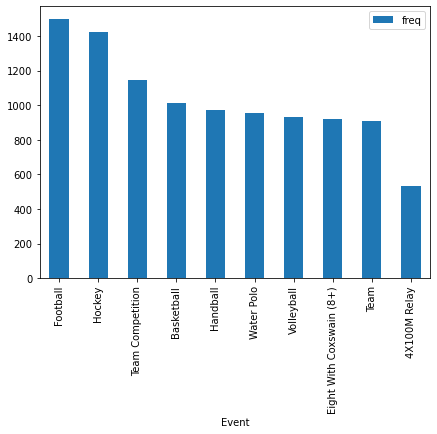

In [12]:
e=[]
for event in df['Event'].unique():
    e.append([event,len(df[df['Event']==event])])
e=pd.DataFrame(e,columns=['Event','freq'])
e=e.sort_values(by='freq',ascending=False)
e.head(10).plot(x='Event',y='freq',kind='bar',figsize=(7,5))
print('The most popular event is\n',e.head(1))

    

### 8. Which sport is having most female Gold Medalists? (Top 5)

The top sport having most number of female gold medalists is
       Sport  No.of female
4  Aquatics           589


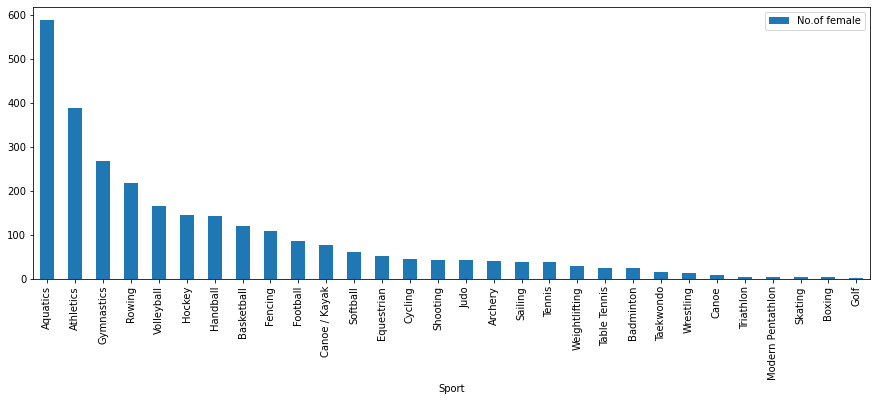

In [13]:
f=gold[(gold['Gender']=='Women')] #dataframe having medal as gold and Gender as women
w=[]
for sport in f['Sport'].unique():
    w.append([sport,len(f[f['Sport']==sport])])
w=pd.DataFrame(w,columns=['Sport','No.of female']) #converting list into dataframe
w=w.sort_values(by='No.of female',ascending=False) #sorting the dataframe
w.plot(x='Sport',y='No.of female',kind='bar',figsize=(15,5)) #plotting
print('The top sport having most number of female gold medalists is\n',w.head(1))
